# Reflect daily stats

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

from reflect.stats import SOLVE_DURATION_DIFFICULTY_BINS, load_firebase_events, compute_per_device_stats, compute_stats, load_features, merge_stats_and_features

## Playing stats

In [2]:
events_df = load_firebase_events()
device_df = compute_per_device_stats(events_df)
stats_df = compute_stats(events_df, device_df)
stats_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19
...,...,...,...,...,...,...,...,...,...
175,2023-10-07,17,17,11,64.705882,35.294118,345.7550,hard,2023-10-07
176,2023-10-08,19,19,18,94.736842,5.263158,40.2980,easy,2023-10-08
177,2023-10-09,20,19,18,94.736842,5.263158,65.5590,easy,2023-10-09
178,2023-10-10,15,15,13,86.666667,13.333333,181.3180,medium,2023-10-10


How many people are playing Reflect?

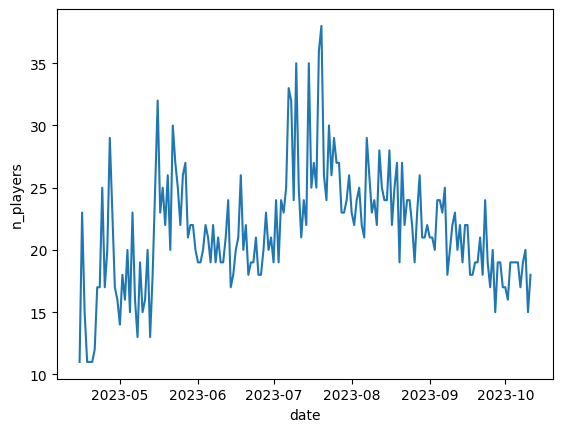

In [3]:
g = sns.lineplot(data=stats_df, x="date", y="n_players")

Total number of players ever (using devices as a proxy - of course the same person may have played on multiple devices)

In [4]:
len(events_df[events_df["name"] == "firstMove"]["device"].unique())

399

## Features

In [5]:
features_df = load_features()
all_df = merge_stats_and_features(stats_df, features_df)
all_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date,filename,...,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,num_zero_reflection_blocks,excess_reflections,num_excess_reflection_beams,num_beam_edges,difficulty,setter_solve_duration_s
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15,puzzle-2023-04-15.txt,...,4.666667,10,28,6,0,2,1,10,4,NaN
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16,puzzle-2023-04-16.txt,...,4.833333,9,29,4,0,2,1,11,4,NaN
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17,puzzle-2023-04-17.txt,...,6.000000,8,30,4,0,6,2,10,4,NaN
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18,puzzle-2023-04-18.txt,...,4.000000,7,28,0,0,1,1,10,4,NaN
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19,puzzle-2023-04-19.txt,...,4.666667,8,28,0,0,1,1,9,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2023-10-07,17,17,11,64.705882,35.294118,345.7550,hard,2023-10-07,puzzle-2023-10-07.txt,...,3.333333,5,30,0,0,1,1,11,4,97.1
176,2023-10-08,19,19,18,94.736842,5.263158,40.2980,easy,2023-10-08,puzzle-2023-10-08.txt,...,3.166667,4,19,0,0,1,1,8,3,58.8
177,2023-10-09,20,19,18,94.736842,5.263158,65.5590,easy,2023-10-09,puzzle-2023-10-09.txt,...,5.800000,7,29,2,0,2,1,10,3,62.3
178,2023-10-10,15,15,13,86.666667,13.333333,181.3180,medium,2023-10-10,puzzle-2023-10-10.txt,...,5.800000,8,29,4,0,2,1,10,4,106.5


## Puzzle difficulty

First let's look at median solve durations (compare to the setter duration indicated by +).

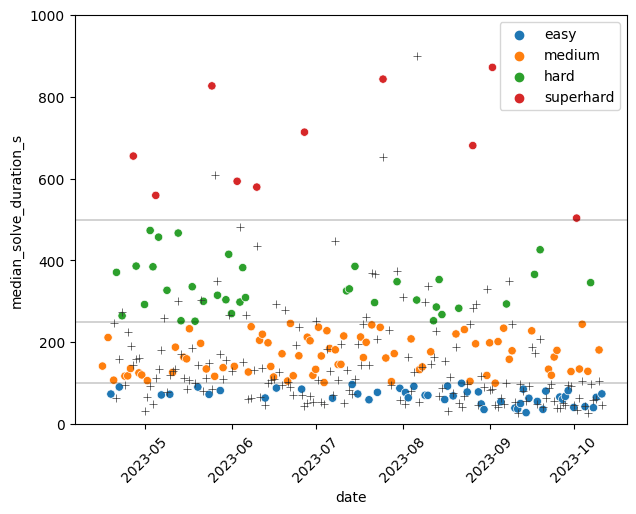

In [6]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');

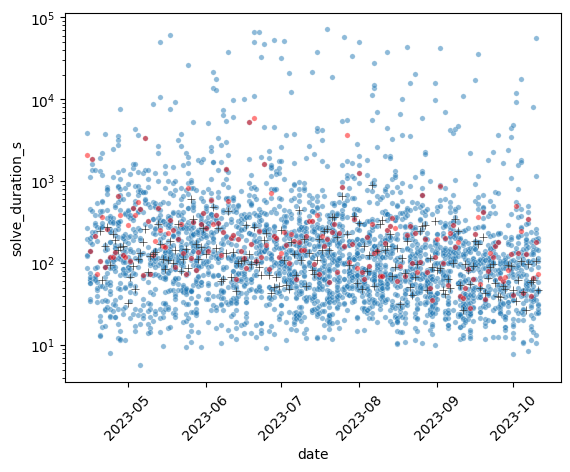

In [7]:
plt.xticks(rotation=45)
g = sns.scatterplot(data=device_df, x="date", y="solve_duration_s", s=15, alpha=0.5)
sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", s=15, alpha=0.5, color="red")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.set(yscale='log');

<Axes: xlabel='date', ylabel='failure_rate'>

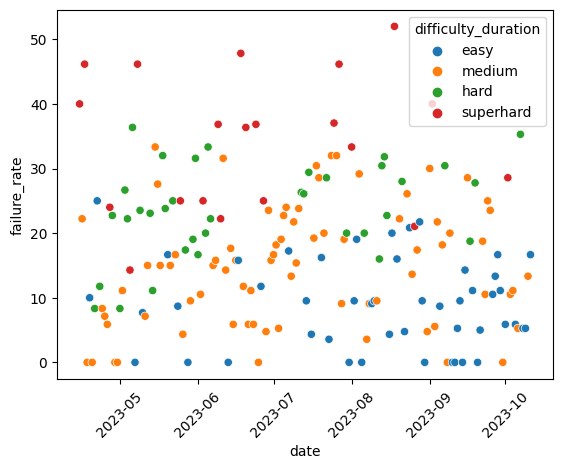

In [8]:
plt.xticks(rotation=45)
sns.scatterplot(data=stats_df, x="date", y="failure_rate", hue="difficulty_duration")

## Feature analysis

Let's see how features correlate with difficulty (as measured by `mean_solve_duration`)

In [9]:
all_df.columns

Index(['puzzle', 'n_players', 'n_started', 'n_solved', 'success_rate',
       'failure_rate', 'median_solve_duration_s', 'difficulty_duration',
       'date', 'filename', 'num_blocks', 'num_mirror_balls', 'num_beams',
       'num_reflections', 'mean_blocks_per_beam', 'max_blocks_per_beam',
       'num_multi_block_beams', 'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance',
       'num_zero_reflection_blocks', 'excess_reflections',
       'num_excess_reflection_beams', 'num_beam_edges', 'difficulty',
       'setter_solve_duration_s'],
      dtype='object')

In [10]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams', 'num_reflections',
       'mean_blocks_per_beam', 'max_blocks_per_beam', 'num_multi_block_beams',
       'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance', 'excess_reflections',
       'num_excess_reflection_beams']

In [11]:
all_df[["median_solve_duration_s", "failure_rate"] + feature_names].corr(numeric_only=True)\
    .sort_values("median_solve_duration_s", ascending=False)

,median_solve_duration_s,failure_rate,num_blocks,num_mirror_balls,num_beams,num_reflections,mean_blocks_per_beam,max_blocks_per_beam,num_multi_block_beams,mean_beams_per_block,max_beams_per_block,num_double_reflect_blocks,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,excess_reflections,num_excess_reflection_beams
median_solve_duration_s,1.000000,0.547801,0.086517,0.066533,0.122639,0.074228,-0.018760,0.121927,0.021471,0.086108,0.084812,0.095340,-0.030345,0.096969,0.201910,0.168454,0.193230,0.160465
failure_rate,0.547801,1.000000,0.139321,0.050855,0.077764,0.081659,0.044372,0.199377,0.015523,0.046318,0.089780,0.033470,-0.037607,0.170946,0.131602,0.257015,0.216619,0.168955
total_beam_distance,0.201910,0.131602,0.153271,0.098150,0.466708,0.337241,-0.227253,0.155731,0.051255,0.299460,-0.056213,0.434994,0.115813,0.348312,1.000000,0.320353,0.132068,0.027797
excess_reflections,0.193230,0.216619,0.327573,-0.451087,-0.316534,0.599712,0.516471,0.559034,-0.143701,-0.149657,-0.285659,0.360228,0.389482,0.207363,0.132068,0.169769,1.000000,0.779818
excess_beam_distance,0.168454,0.257015,-0.142251,-0.287400,-0.160132,0.270417,0.071760,0.264460,-0.163924,-0.034198,-0.314560,0.321376,0.361997,0.708879,0.320353,1.000000,0.169769,0.061073
num_excess_reflection_beams,0.160465,0.168955,0.257178,-0.220891,-0.201637,0.400446,0.456114,0.207883,0.039688,0.010372,-0.007833,0.242110,0.179510,0.023062,0.027797,0.061073,0.779818,1.000000
num_beams,0.122639,0.077764,-0.039638,0.819605,1.000000,-0.223750,-0.595970,-0.154372,0.163236,0.785551,0.619054,0.173647,-0.798092,-0.193378,0.466708,-0.160132,-0.316534,-0.201637
max_blocks_per_beam,0.121927,0.199377,0.160879,-0.326606,-0.154372,0.480729,0.343032,1.000000,-0.267634,0.014695,-0.160034,0.374652,0.232447,0.326104,0.155731,0.264460,0.559034,0.207883
max_beam_distance,0.096969,0.170946,-0.086426,-0.290223,-0.193378,0.206095,0.008671,0.326104,-0.251761,-0.166272,-0.351694,0.205509,0.416723,1.000000,0.348312,0.708879,0.207363,0.023062
num_double_reflect_blocks,0.095340,0.033470,0.133666,-0.056866,0.173647,0.731675,0.293740,0.374652,0.281184,0.413578,-0.297580,1.000000,0.018358,0.205509,0.434994,0.321376,0.360228,0.242110


## Predictions over time

Train a model on data up to, but not including, date D, then use it to predict the solve duration on date D.

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
np.random.seed(42)

In [14]:
model_df = all_df[all_df["median_solve_duration_s"] < 1000] # remove outliers for model

In [15]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams',
        'num_reflections',
        'max_blocks_per_beam',
       'num_double_reflect_blocks', 'excess_reflections']

In [16]:
response_variable = "median_solve_duration_s"

In [17]:
predict_df = model_df.copy()
predict_df["predicted_solve_duration_s"] = np.nan

puzzles = model_df[model_df["puzzle"] >= "2023-05-01"]["puzzle"].tolist()

for puzzle in puzzles:
    train_df = model_df[model_df["puzzle"] < puzzle]
    X_train = train_df[feature_names]
    y_train = train_df[[response_variable]].values.ravel()

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predicted_solve_duration_s = model.predict(model_df[model_df["puzzle"] == puzzle][feature_names])[0]

    predict_df.loc[predict_df['puzzle']==puzzle, ['predicted_solve_duration_s']] = predicted_solve_duration_s

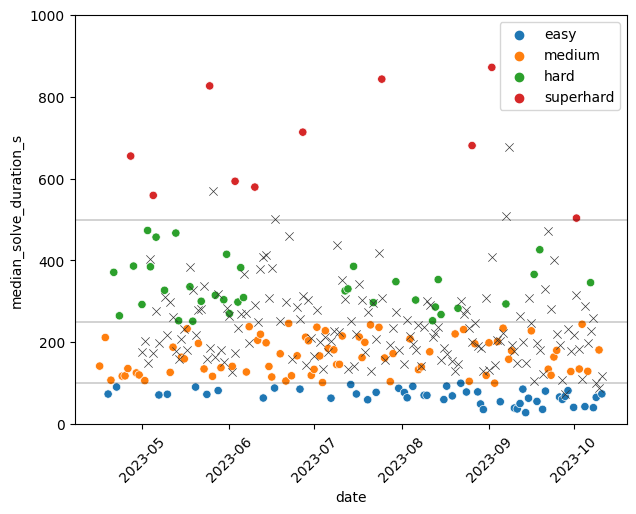

In [18]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=predict_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
# sns.scatterplot(data=predict_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
sns.scatterplot(data=predict_df, x="date", y="predicted_solve_duration_s", color=".2", marker="x")

g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');